In [2]:
%%time
#import starndard packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

#load the available data overview
df=pd.read_csv("https://raw.githubusercontent.com/anilak1978/ecommerce/master/OnlineRetail.csv",encoding="ISO-8859-1",low_memory=False)

CPU times: user 2.7 s, sys: 1.15 s, total: 3.85 s
Wall time: 1min 10s


In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


 df.info()

In [5]:
#Check for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

# Feature Engineering


In [11]:
#Add revenue Varriable and update Invoice date
df['Revenue']=df['UnitPrice']*df['Quantity']
#converts invoice date to datatime data
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate'])
#Creats months column
df['InvoiceMonth']=pd.DatetimeIndex(df['InvoiceDate']).month
#Creats Years column
df["InvoiceYear"]=pd.DatetimeIndex(df["InvoiceDate"]).year
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,InvoiceYear
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010


# Data Exploration 

In [14]:
#Descriptive statistics
df.describe()

,Quantity,UnitPrice,CustomerID,Revenue,InvoiceMonth,InvoiceYear
count,541909.000000,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795,7.553128,2010.921609
std,218.081158,96.759853,1713.600303,378.810824,3.509055,0.268787
min,-80995.000000,-11062.060000,12346.000000,-168469.600000,1.000000,2010.000000
25%,1.000000,1.250000,13953.000000,3.400000,5.000000,2011.000000
50%,3.000000,2.080000,15152.000000,9.750000,8.000000,2011.000000
75%,10.000000,4.130000,16791.000000,17.400000,11.000000,2011.000000
max,80995.000000,38970.000000,18287.000000,168469.600000,12.000000,2011.000000


# Monthly Revenue Overview

Text(0, 0.5, 'Revenue')

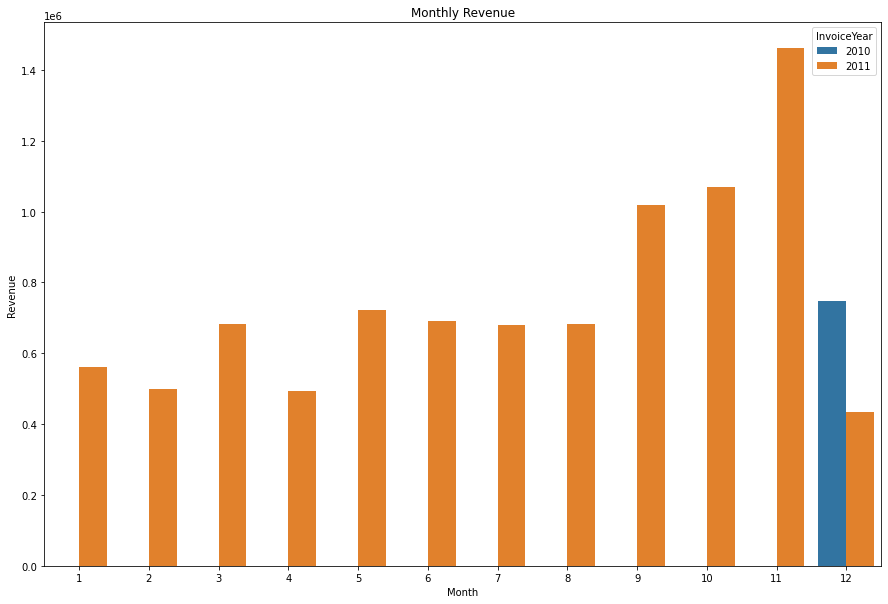

In [19]:
%matplotlib inline
#Monthly revenue overview
df_revenue=df.groupby(['InvoiceMonth','InvoiceYear'])['Revenue'].sum().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x='InvoiceMonth',y='Revenue',hue='InvoiceYear',data=df_revenue)
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')


## We could use seaborn also

<AxesSubplot:xlabel='InvoiceMonth', ylabel='Revenue'>

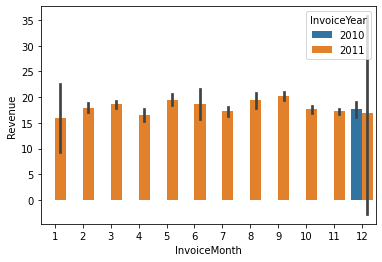

In [24]:
sns.barplot(x='InvoiceMonth',y='Revenue',hue='InvoiceYear',data=df)

In [28]:
#Looking into the december 2011 data 
df[(df['InvoiceMonth']==12)&(df['InvoiceYear']==2011)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,InvoiceYear
516384,C579889,23245,SET OF 3 REGENCY CAKE TINS,-8,2011-12-01 08:12:00,4.15,13853.0,United Kingdom,-33.20,12,2011
516385,C579890,84947,ANTIQUE SILVER TEA GLASS ENGRAVED,-1,2011-12-01 08:14:00,1.25,15197.0,United Kingdom,-1.25,12,2011
516386,C579890,23374,RED SPOT PAPER GIFT BAG,-1,2011-12-01 08:14:00,0.82,15197.0,United Kingdom,-0.82,12,2011
516387,C579890,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,-2,2011-12-01 08:14:00,0.85,15197.0,United Kingdom,-1.70,12,2011
516388,C579891,23485,BOTANICAL GARDENS WALL CLOCK,-1,2011-12-01 08:18:00,25.00,13644.0,United Kingdom,-25.00,12,2011
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,12,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,12,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,12,2011


Based on the Decenber 2011 data, we understand that the data set does not include any purchase after 9th 2011. We need to make sure we consider this within our analysis and conclusion. On a seperate note, we can see that the revenue grows steadily starting from september 2011 all the way up to December 2011, November being the best month interms of revenue.

## Monthly Items Sold Overview

Text(0, 0.5, 'Items Sold')

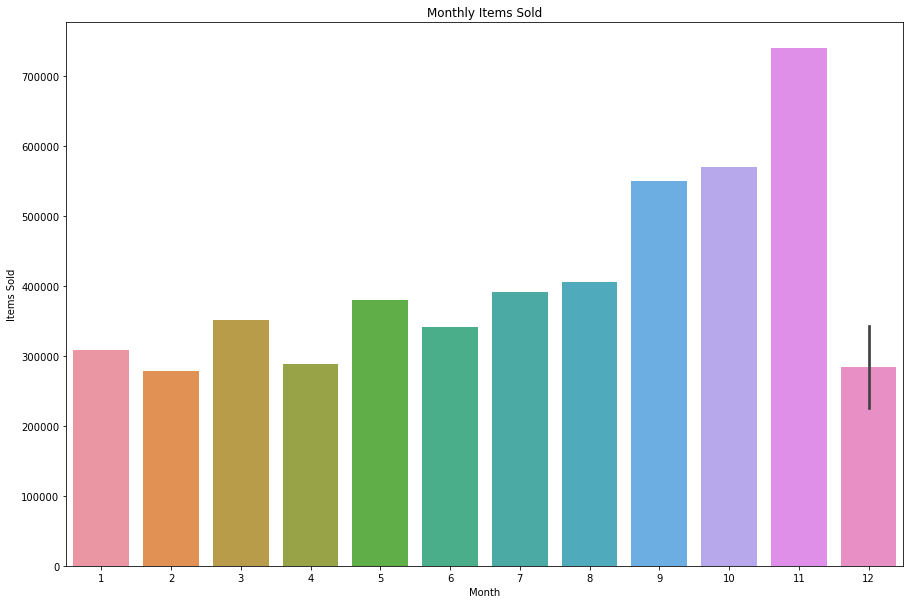

In [36]:
df_quantity=df.groupby(['InvoiceMonth','InvoiceYear'])['Quantity'].sum().reset_index()
plt.figure(figsize=(15,10))
sns.barplot(x='InvoiceMonth',y='Quantity',data=df_quantity)
plt.title('Monthly Items Sold')
plt.xlabel('Month')
plt.ylabel('Items Sold')

## Monthly Active Users

Text(0.5, 0, 'Month')

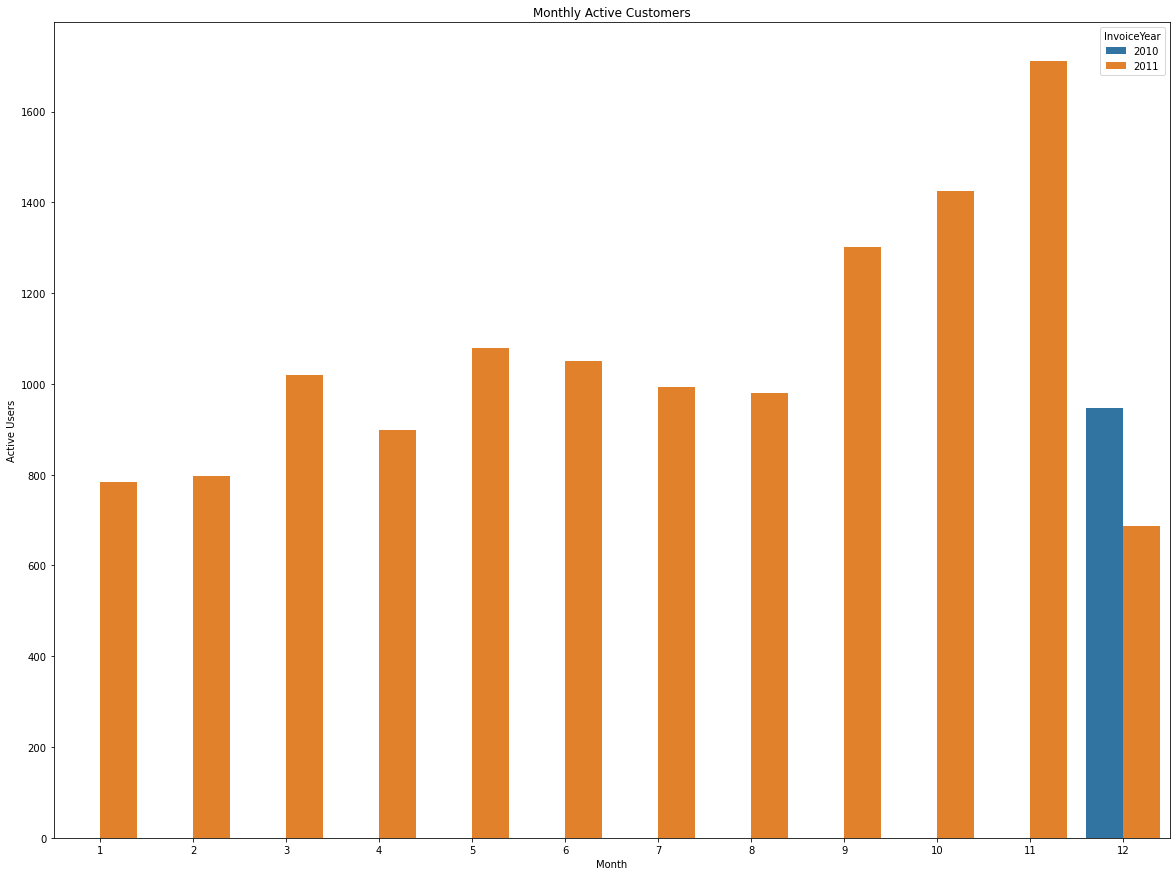

In [39]:
df_active=df.groupby(['InvoiceMonth','InvoiceYear'])['CustomerID'].nunique().reset_index()
plt.figure(figsize=(20,15))
sns.barplot(x='InvoiceMonth',y="CustomerID",hue='InvoiceYear',data=df_active)
plt.title('Monthly Active Customers')
plt.ylabel('Active Users')
plt.xlabel('Month')

## Average Revenue Monthly

Text(0, 0.5, 'Revenue')

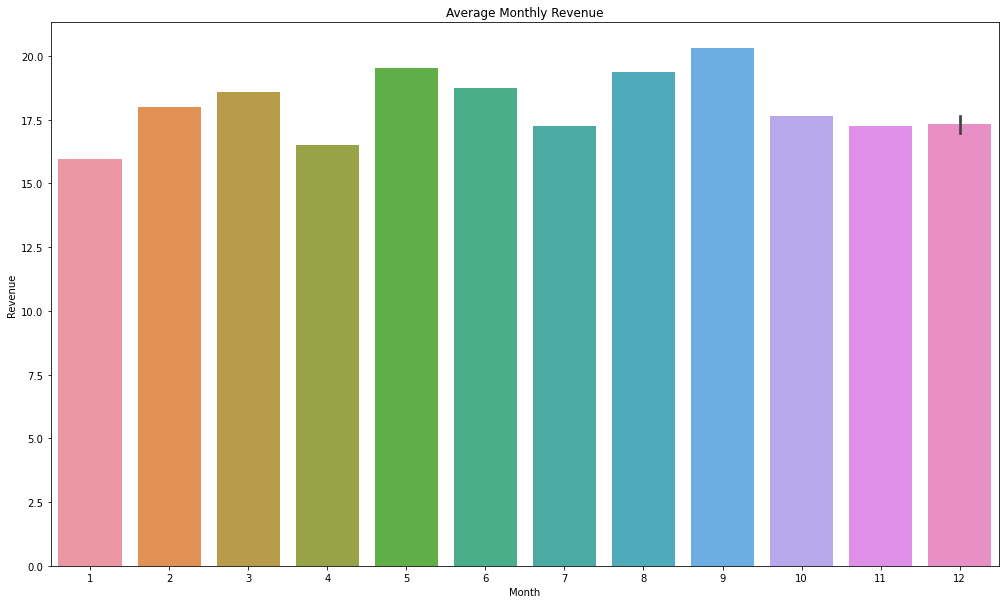

In [41]:
df_average_revenue=df.groupby(['InvoiceMonth','InvoiceYear'])['Revenue'].mean().reset_index()
plt.figure(figsize=(17,10))
sns.barplot(x='InvoiceMonth',y='Revenue',data=df_average_revenue)
plt.title('Average Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')

## New vs Existing Users

In [44]:
df_first_purchase=df.groupby(['CustomerID'])['InvoiceDate'].min().reset_index()
#Renaming column
df_first_purchase.columns=['CustomerID','FirstPurchaseDate']
#Merging
df=pd.merge(df,df_first_purchase,on='CustomerID')
df['UserType']='New'
df.loc[df['InvoiceDate']>df['FirstPurchaseDate'],'UserType']='Existing'
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,InvoiceYear,FirstPurchaseDate_x,UserType,FirstPurchaseDate_y,FirstPurchaseDate
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,2010,2010-12-01 08:26:00,New,2010-12-01 08:26:00,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,2010-12-01 08:26:00,New,2010-12-01 08:26:00,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,12,2010,2010-12-01 08:26:00,New,2010-12-01 08:26:00,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,2010-12-01 08:26:00,New,2010-12-01 08:26:00,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,12,2010,2010-12-01 08:26:00,New,2010-12-01 08:26:00,2010-12-01 08:26:00


Text(23.128221450617282, 0.5, 'Revenue')

<Figure size 1296x1800 with 0 Axes>

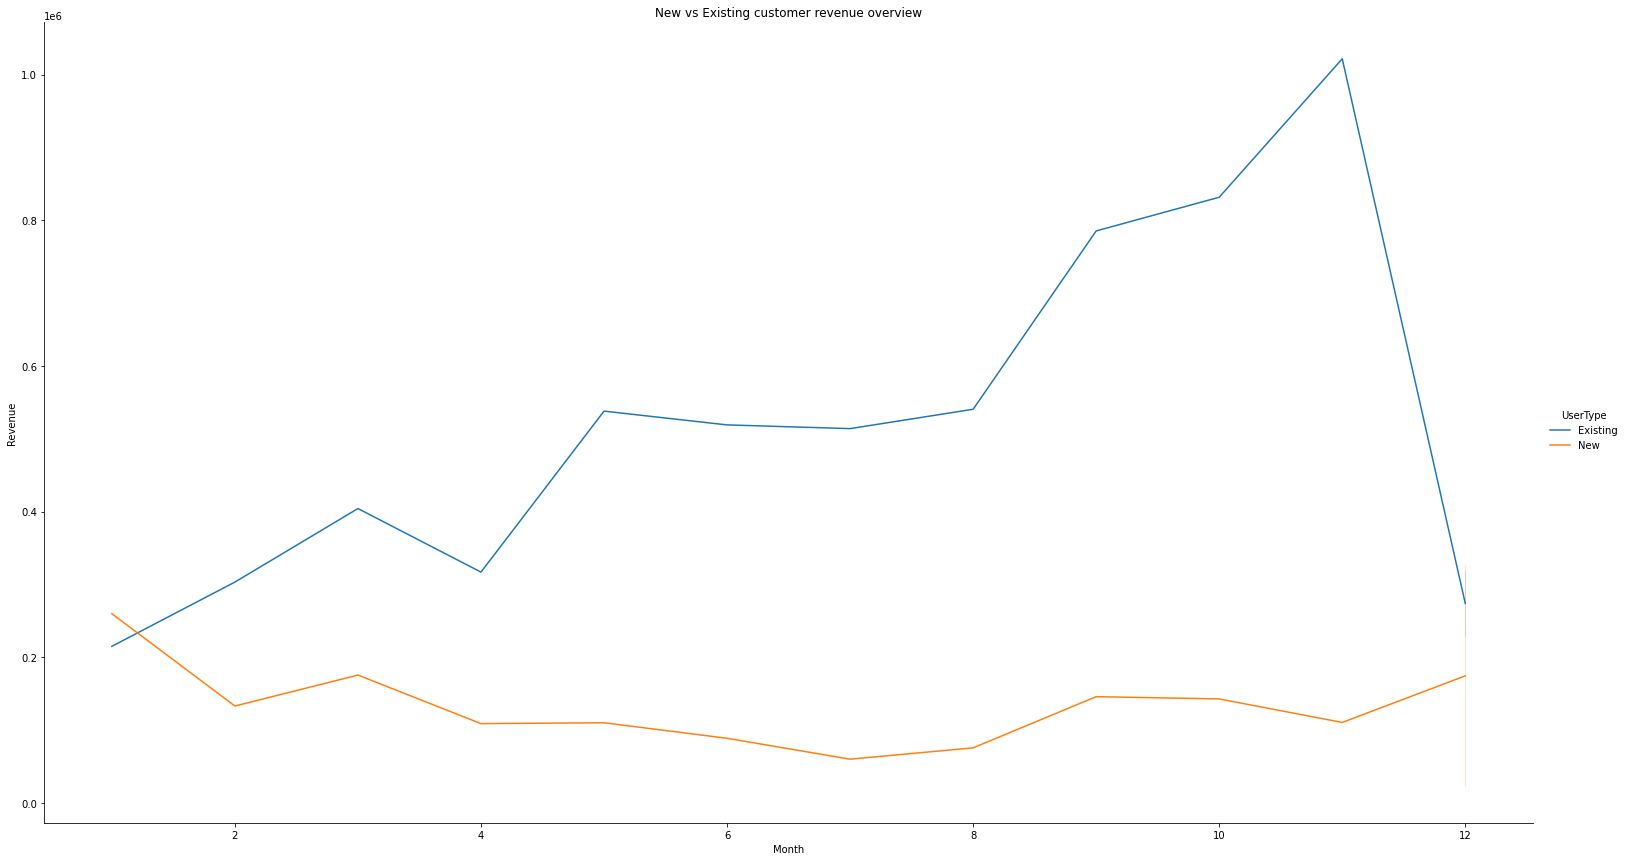

In [49]:
df_new_revenue=df.groupby(['InvoiceMonth','InvoiceYear','UserType'])['Revenue'].sum().reset_index()
plt.figure(figsize=(18,25))
sns.relplot(x="InvoiceMonth",y="Revenue",hue="UserType",data=df_new_revenue,kind="line",height=12,aspect=18/10)
plt.title('New vs Existing customer revenue overview')
plt.xlabel('Month')
plt.ylabel('Revenue')